In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [35]:
freq_array = np.asarray([2.381, 2.128, 2.041, 1.923, 1.887, 1.786, 1.724, 1.695, 1.613, 1.563, 1.493])
current_array = np.asarray([15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5])
# current_array = np.asarray([0.015, 0.014, 0.013, 0.012, 0.011, 0.010, 0.009, 0.008, 0.007, 0.006, 0.005])


In [36]:
def frequency_function(current, tau):
    resistance = 47000
    voltage_th = 1
    t_ref = 0.25
    f = 1/(t_ref - tau * np.log(1 - voltage_th/(current*resistance)))
    return f

In [37]:
param, cov = curve_fit(frequency_function, current_array, freq_array)
tau = param[0]
print("tau: {}".format(tau))
print(cov)

tau: 132106.20512654082
[[29492964.90940744]]


Text(0, 0.5, 'Frequency (Hz)')

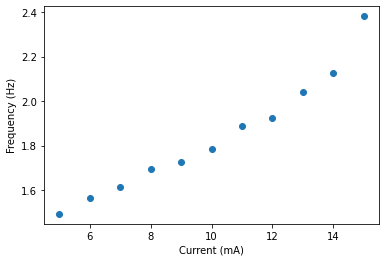

In [38]:
plt.plot(current_array, freq_array, 'o')
plt.xlabel("Current (mA)")
plt.ylabel("Frequency (Hz)")

In [39]:
new_frequencies = [frequency_function(c, tau) for c in current_array]

Text(0, 0.5, 'Frequency (Hz)')

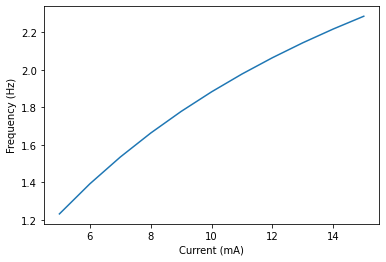

In [40]:
plt.plot(current_array, new_frequencies, '-')
plt.xlabel("Current (mA)")
plt.ylabel("Frequency (Hz)")

0.7557134910396559


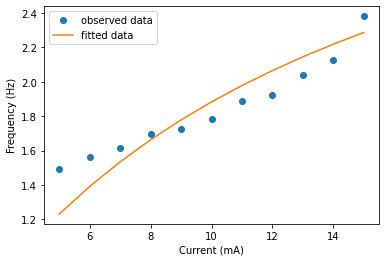

In [41]:
from sklearn.metrics import r2_score

plt.plot(current_array, freq_array, 'o', label='observed data')
plt.plot(current_array, new_frequencies, '-', label='fitted data')
plt.xlabel("Current (mA)")
plt.ylabel("Frequency (Hz)")
plt.legend()
# axes labels
#comment on freq being off, expected something else

r2 = r2_score(freq_array, new_frequencies)
print(r2)

In [47]:
def freq2(current, tau, voltage_th, t_ref):
    resistance = 47000
    f = 1/(t_ref - tau * np.log(1 - voltage_th/(current*resistance)))
    return f

param, cov = curve_fit(freq2, current_array, freq_array, p0=[tau, 1, 0.25])

v_th = param[1]
tref = param[2]
print(param)
v_var_unc = cov[1][1]
tref_var_unc = cov[2][2]
print(v_var_unc, tref_var_unc)

[9.99047406e+04 9.43080893e-01 3.29830996e-01]
446.06352925331674 0.0009746709535634095


Text(0, 0.5, 'Frequency (Hz)')

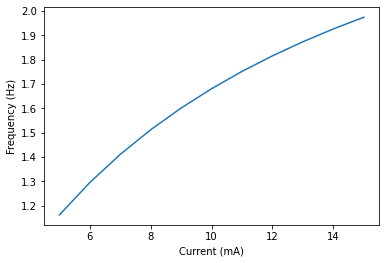

In [46]:
new_frequencies2 = [freq2(c, tau, v_th, tref) for c in current_array]
plt.plot(current_array, new_frequencies2, '-')
plt.xlabel("Current (mA)")
plt.ylabel("Frequency (Hz)")

In [23]:
print(param)
v_comp = abs(1 - param[1])
tref_comp = abs(0.25 - param[2])/0.25
print(v_comp, tref_comp)

[9.99047406e+04 9.43080893e-01 3.29830996e-01]
0.056919107082586406 0.31932398544985907


In [24]:
def perfect_if(current, v_th, tref):
    capacitance = 0.22
    f = current / ((capacitance * v_th) + (tref * current))
    return f

In [25]:
perfect_arr = [perfect_if(c, 1, 0.25) for c in current_array]

Text(0, 0.5, 'Frequency (Hz)')

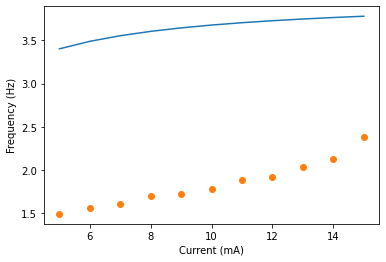

In [27]:
plt.plot(current_array, perfect_arr, '-')
plt.plot(current_array, freq_array, 'o')
plt.xlabel("Current (mA)")
plt.ylabel("Frequency (Hz)")